# 🚜 Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers

## 1. Problem Definition
> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Blue Book for Bulldozers competition
There are three main datasets

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.
 Link here
 https://www.kaggle.com/c/bluebook-for-bulldozers/data

## 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.


## 4. Features
1. SalesID	  unique identifier of a particular sale of a machine at auction
2. MachineID	  identifier for a particular machine;  machines may have multiple sales
3. ModelID	  identifier for a unique machine model (i.e. fiModelDesc)
4. datasource	  source of the sale record;  some sources are more diligent about reporting attributes of the machine than others.  Note that a particular datasource may report on multiple auctioneerIDs.
5. auctioneerID	  identifier of a particular auctioneer, i.e. company that sold the machine at auction.  Not the same as datasource.
6. YearMade	  year of manufacturer of the Machine
7. MachineHoursCurrentMeter	  current usage of the machine in hours at time of sale (saledate);  null or 0 means no hours have been reported for that sale
8. UsageBand	  value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel;  e.g. 'Low' means this machine has less hours given it's lifespan relative to average of fiBaseModel.
9. Saledate	  time of sale
10. Saleprice	  cost of sale in USD
11. fiModelDesc	  Description of a unique machine model (see ModelID); concatenation of fiBaseModel & 12. fiSecondaryDesc & fiModelSeries & fiModelDescriptor
13. fiBaseModel	  disaggregation of fiModelDesc
14. fiSecondaryDesc	  disaggregation of fiModelDesc
15. fiModelSeries	  disaggregation of fiModelDesc
16. fiModelDescriptor	  disaggregation of fiModelDesc
17.ProductSize	  Don't know what this is 
18. ProductClassDesc	  description of 2nd level hierarchical grouping (below ProductGroup) of fiModelDesc
19. State	  US State in which sale occurred
20. ProductGroup	  identifier for top-level hierarchical grouping of fiModelDesc
21. ProductGroupDesc	  description of top-level hierarchical grouping of fiModelDesc
22. Drive_System	machine configuration;  typcially describes whether 2 or 4 wheel drive
23. Enclosure	machine configuration - does machine have an enclosed cab or not
24. Forks	machine configuration - attachment used for lifting
25. Pad_Type	machine configuration - type of treads a crawler machine uses
26. Ride_Control	machine configuration - optional feature on loaders to make the ride smoother
27. Stick	machine configuration - type of control 
28. Transmission	machine configuration - describes type of transmission;  typically automatic or manual
29. Turbocharged	machine configuration - engine naturally aspirated or turbocharged
30. Blade_Extension	machine configuration - extension of standard blade
31. Blade_Width	machine configuration - width of blade
32. Enclosure_Type	machine configuration - does machine have an enclosed cab or not
33. Engine_Horsepower	machine configuration - engine horsepower rating
34. Hydraulics	machine configuration - type of hydraulics
35. Pushblock	machine configuration - option
36. Ripper	machine configuration - implement attached to machine to till soil
37. Scarifier	machine configuration - implement attached to machine to condition soil
38. Tip_control	machine configuration - type of blade control
39. Tire_Size	machine configuration - size of primary tires
40. Coupler	machine configuration - type of implement interface
41. Coupler_System	machine configuration - type of implement interface
42. Grouser_Tracks	machine configuration - describes ground contact interface
43. Hydraulics_Flow	machine configuration - normal or high flow hydraulic system
44. Track_Type	machine configuration - type of treads a crawler machine uses
45. Undercarriage_Pad_Width	machine configuration - width of crawler treads
46. Stick_Length	machine configuration - length of machine digging implement
47. Thumb	machine configuration - attachment used for grabbing
48. Pattern_Changer	machine configuration - can adjust the operator control configuration to suit the user
49. Grouser_Type	machine configuration - type of treads a crawler machine uses
50. Backhoe_Mounting	machine configuration - optional interface used to add a backhoe attachment
51. Blade_Type	machine configuration - describes type of blade
52. Travel_Controls	machine configuration - describes operator control configuration
53. Differential_Type	machine configuration - differential type, typically locking or standard
54. Steering_Controls	machine configuration - describes operator control configuration

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from jupyterthemes import jtplot
jtplot.style(theme='oceans16')

In [4]:
df = pd.read_csv('data/TrainAndValid.csv', low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

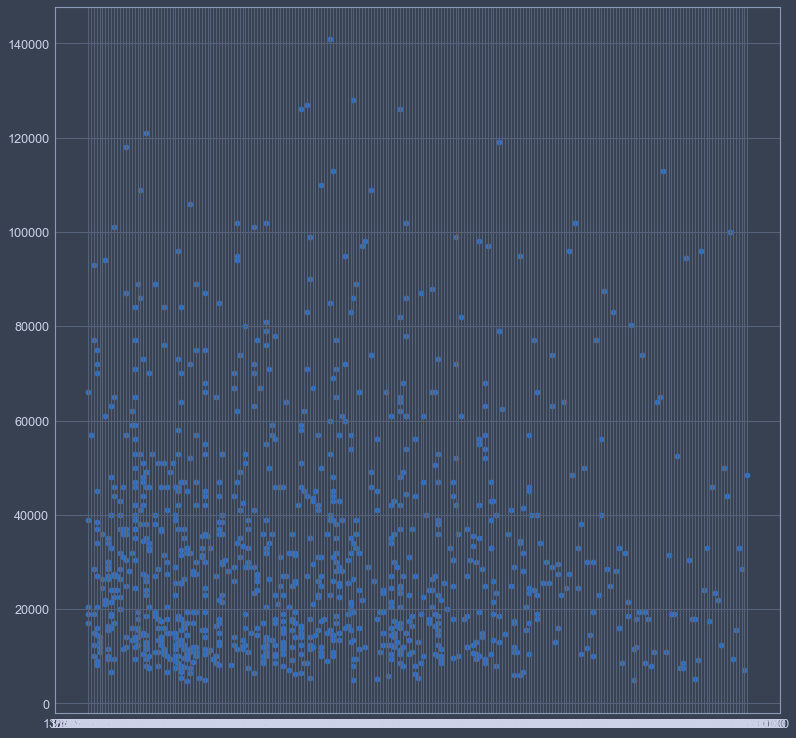

In [6]:
fig, ax = plt.subplots(figsize=(13,13))
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

<AxesSubplot:ylabel='Frequency'>

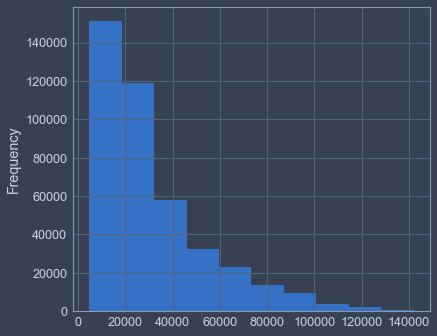

In [7]:
df.SalePrice.plot.hist()

In [8]:
df['saledate']

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

### Parsing dates
When we work with Time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter

In [9]:
# Import data again but this time parse dates
df = pd.read_csv('data/TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

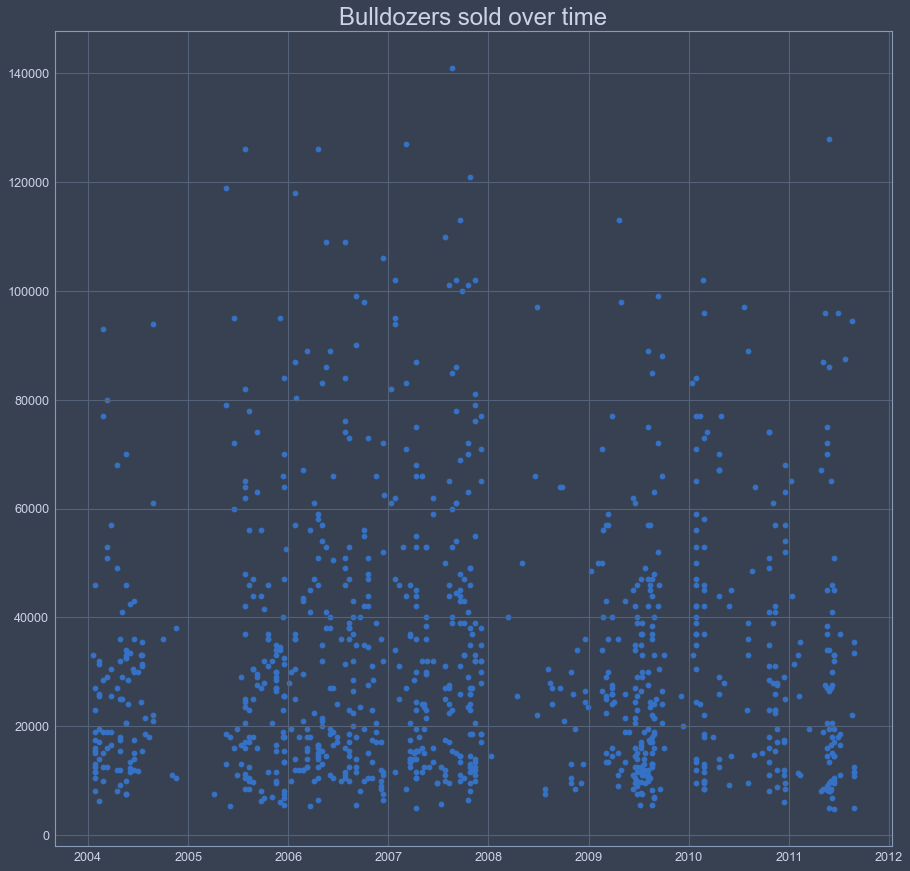

In [11]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])
ax.set_title('Bulldozers sold over time', fontsize= 24)
plt.show()

In [12]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Notice that after saledate truncates the columns(this means shortens the amount of columns, hence the '...'). A little trick to work around this is to use the transpose method

In [13]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.000000,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.000000,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.000000,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


There's clearly many columns here. It would take us days to figure out everything happening here. So let's focus on the wildly important column.

The `saledate` column. Let's start by sorting that

In [14]:
df['saledate'].head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort data frame by saledate

When working with Time series data, it's a good idea to sort it by date.

In [15]:
#  Sort Dataframe in date order
df.sort_values(by=['saledate'], inplace=True, ascending=True)
df['saledate'].head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original dataframe
We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data

In [26]:
# Make a copy
df_tmp = df.copy()
df_tmp.head(30).T

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390,...,144032,54438,144952,205752,28927,86971,67034,87602,53101,205784
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,...,1511962,1301582,1513611,1646995,1259973,1391027,1340383,1391932,1298915,1647221
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0,23500.0,31000.0,11750.0,63000.0,13000.0,...,17000.0,24000.0,85000.0,10500.0,7700.0,18000.0,110000.0,41000.0,49000.0,15000.0
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,...,1136546,1199381,1275148,1044876,1150485,1250405,1311130,154142,1338785,1476216
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,...,7464,4123,3371,8443,6788,7008,3406,7008,4124,8443
datasource,132,132,132,132,132,132,132,132,132,132,...,132,132,132,132,132,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.0,18.0,99.0,99.0,18.0,99.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984,1976,1986,1970,1987,1966,...,1973,1974,1983,1973,1978,1974,1987,1981,1984,1979
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,...,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


## Add datetime parameters for `saledate` column

In [17]:
df_tmp['saleYear'] = df['saledate'].dt.year
#Creating a column with only the year in each row #dt allows us to access it as a datetime
#object

In [18]:
df_tmp[:2].saledate.dt.year

205615    1989
274835    1989
Name: saledate, dtype: int64

In [19]:
df_tmp[:2].saledate

205615   1989-01-17
274835   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [20]:
df_tmp[:2].saledate.dt.day
#Looking at only the days in the first two rows

205615    17
274835    31
Name: saledate, dtype: int64

In [21]:
# Now let's create different columns/features to enrich our dataset and make it easier to plot
df_tmp['saleMonth'] = df_tmp.saledate.dt.month
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['saleDayOfWeek'] = df_tmp.saledate.dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp.saledate.dt.dayofyear

In [22]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [23]:
# Now we've enriched our DataFrame with date time columns, we can drop saledate(If we ever want it back, we can just go for the original)
df_tmp.drop(labels='saledate', axis=1, inplace=True)

In [24]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling

We've done some EDA. We can always do more, but let's move forward and do some model driven EDA. Afterall, we already have an evaluation metric moving towards

In [27]:
# Let's build a machine learning model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

model = RandomForestRegressor(n_jobs=-1,#No. of jobs to run. -1 means we're using all processes
                              random_state=12# Works like np.random.seed()
                             )
x = df_tmp.drop(labels='SalePrice', axis=1)
y = df_tmp['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
model.fit(x_train, y_train)

ValueError: could not convert string to float: 'High'

Okay, this shows us that we have some categorical features that need to be converted into numbers before fitting our data to any machne learning model. Also, there's some  NaN values that need to be dealt with. So we have to clean our data first

_Little Quote I really liked_:

Let me state the scenario so there's context.
* "Daniel what are you doing, you're not even working with your temporary dataframe.
> Well this is all part of the game right? Making mistakes and then going back and fixing them. That's part of being a data scientist, **HEAPS OF EXPERIMENTATION**

### Convert strings to categories

One way we can turn all our strings to numbers is by converting them into  panda's categories

Learn about converting them here
https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

**Definition:**

The category data type in pandas is a hybrid data type. It looks and behaves like a string in many instances but internally is represented by an array of integers. This allows the data to be sorted in a custom order and to more efficiently store the data

A lot of machine learning is basically getting some data, and preparing it to run with an existing machine learning model that we've chosen

It's about getting some inputs and cleaning( or massaging) your data in a way that makes it work with the machine learning model, and then give us an output to evaluate

That's what we're doing here. We're manipulating our inputs to work with our machine learning model

Let's find the labels that are strings and convert them into the category datatype

but not by typing our each one. Le'ts write a for loop

In [57]:
# Find the columns which contain strings
for label, columns in df_tmp.items(): 
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


`.items()` manipulates our dataframe like a dictionary, where `.items()` is the information in the data while `.keys(` is the column names)

**Cool Resources for Pandas know how*
 
 Link 1 - General Utility Functions
https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html
    
Link 2 - Categories
https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html


In [60]:
# This will turn all of our string values into categorical values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype('category').cat.as_ordered()

In [61]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [63]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [64]:
#Check how pandas treats the categorical values as numbers
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Thanks to pandas categories, we now have a way to access all of our data in the form of numbers. but we still have a bunch of missing data

In [68]:
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

# Save preprocessed data

In [69]:
# Export current tmp dataframe
df_tmp.to_csv('data/train_temp.csv', index=False)

In [29]:
# Import preprocessed data
df_imp = pd.read_csv('data/train_temp.csv', low_memory=False)

In [30]:
df_imp.isna().sum()/len(df_imp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [31]:
# Reusing our code to convert strings into categories
# This will turn all of our string values into categorical values
for label, content in df_imp.items():
    if pd.api.types.is_string_dtype(content):
        df_imp[label] = content.astype('category').cat.as_ordered()

In [32]:
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

## Fill missing values


**Let's fill the numerical missing values first**

In [36]:
 for label, content in df_imp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear
auctioneerID_is_missing
MachineHoursCurrentMeter_is_missing


In [34]:
for label, content in df_imp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(content)

0         18.0
1         99.0
2         99.0
3         99.0
4         99.0
          ... 
412693    99.0
412694    99.0
412695    99.0
412696    99.0
412697    99.0
Name: auctioneerID, Length: 412698, dtype: float64
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
412693   NaN
412694   NaN
412695   NaN
412696   NaN
412697   NaN
Name: MachineHoursCurrentMeter, Length: 412698, dtype: float64


In [37]:
# Fill numeric rows with the median
for label, content in df_imp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data is missing
            # This will be useful in the future. 
            df_imp[label+"_is_missing"] =pd.isnull(content)
            # FIll missing numerical values with median.
            df_imp[label] = content.fillna(content.median())

So why use the median?. The reason being is that the median is more robust than the mean. When we use the mean when there's alot of idfferent values, the column is much more sensitive to outliers

In [38]:
# Demonstrate how median is more robust than mean.
lone_hundreds = np.full((1000,), 1000)
hundred_billions = np.append(lone_hundreds, 1000000000)
np.mean(lone_hundreds), np.mean(hundred_billions), np.median(lone_hundreds), np.median(hundred_billions)

(1000.0, 1000000.0, 1000.0, 1000.0)

We appended `lone_hundreds` to a different array (`hundred_billions`) and then added a billion on the last part of it.. Notice the drastic mean difference. Obviously this is an extreme example but this is just to show u how the mean accepts the outliers in a way that represents our data inaccurately.

In [39]:
df_imp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

In [40]:
df_imp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

## Fill missing categorical variables and turning them into numbers

In [41]:
for label, content in df_imp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [42]:
pd.Categorical(df_imp['state']).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [22]:
#Turn categorical variables into numbers and fill missing
for label, content in df_imp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add binary column to indicate whether sample has missing value or not
        df_imp[label+'_is_missing'] = pd.isnull(content)
        #Turn categories into numbers and add +1
        df_imp[label] = pd.Categorical(content).codes + 1

Now why are we adding plus one to the columns and they are not numbers?
Well, Categorical variables work in a way where every data that looks like text is assigned a number.

If a value is missing, the number it will be assigned will be -1. adding +1s will make it 0.  Let me demonstrate this

In [43]:
pd.Categorical(df_imp['UsageBand'])

[NaN, NaN, NaN, NaN, NaN, ..., NaN, NaN, NaN, NaN, NaN]
Length: 412698
Categories (3, object): ['High' < 'Low' < 'Medium']

In [45]:
pd.Categorical(df_imp['UsageBand']).codes

array([-1, -1, -1, ..., -1, -1, -1], dtype=int8)

In [46]:
pd.Categorical(df_imp['UsageBand']).categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [47]:
pd.Categorical(df_imp['UsageBand']).codes + 1

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [19]:
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [20]:
df_imp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [21]:
df_imp.isna().sum()[:49]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

Now that all of our data is numeric and has no missing values, Let's get back to building a machine learning model

In [22]:
# Build a machine learning model. Importing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#Letting it track the time our model runs for
    

x = df_imp.drop(labels='SalePrice', axis='columns')
y = df_imp['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

rf_reg = RandomForestRegressor(n_jobs=-1, random_state=42, verbose=2)

%timeit rf_reg.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   25.8s


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   26.6s


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   27.1s


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   27.1s


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   26.1s


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   25.6s


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   25.6s


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   25.6s


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished


1min 54s +- 3.75 s per loop (mean +- std. dev. of 7 runs, 1 loop each)


In [22]:
print('A joke this?')

A joke this?


In [24]:
rf_reg.score(x_test, y_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.0s finished


0.9050515914220454

Our model is 90% accurate but this may not be very reliable. Even though we split our data up, I didn't work with the splitting methods from kaggle

The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012..

so let's try that,  I'll split the data manually since we're using the 'TrainandValid.csv' file. I'll split one set into training (before 2011) and the rest into valid (2012 - onwards)

## Splitting up data into train/validation sets

Good example to teach us how to split data manually with a time series. WE chose this set on purpose so we could do this

In [24]:
# Split data into training and validation
df_val = df_imp[df_imp.saleYear==2012]
df_train = df_imp[df_imp.saleYear!=2012]
len(df_train), len(df_val)

(401125, 11573)

In [25]:
 #Split data into x & y training and validation sets.
x_train, y_train = df_train.drop(labels='SalePrice', axis=1), df_train.SalePrice
x_val, y_val = df_val.drop(labels='SalePrice', axis='columns'), df_val.SalePrice

In [26]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building an evaluation function

In [27]:
# Create an evaluation function (the competiiton uses RMSLE)
#There's no root mean log squared error in sklearn. we will have to find the square root
# to the mean squared log error
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

Mean absolute error takes the difference between the predicted and true values, and then takes the mean of that.

Meansquared log error moreso tells you about the ratio. SO the average percentage of how off your predicted values are from the real values

In [28]:
# Create evaluation function (The competition uses RMSLE)
def rmsle(y_test, y_preds):
    '''
    Calculates root mean squared log error between predictions and truth labels
    '''
    return np.sqrt(mean_squared_log_error(y_test, y_preds))
# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_val)
    scores = {'Training MAE' : mean_absolute_error(y_train, train_preds),
              'Valid MAE' : mean_absolute_error(y_val, val_preds),
              'Training RMSLE' : rmsle(y_train, train_preds),
              'Valid RMSLE' : rmsle(y_val, val_preds),
              'Training R^2' : r2_score(y_train, train_preds),
              'Valid R^2' : r2_score(y_val, val_preds)
             }
    return scores

## Testing our model on a subset of data (to tune the hyperparameters)

Last time it took way too long to fit our model (about 10 or so mins). I cant have my cells taking 10 minutes to run. I ain't got tha time!

In [75]:
# # This takes far too long... for experimenting

# %time
# model = RandomForestRegressor(n_jobs=-1,
#                               random_state=42)

# model.fit(x_train, y_train)
# We could do it like this
# model.fit(x_train[:10000], y_train[:10000])
# but there's an even better way by tweaking the parameters for RandomForestRegressor

In [29]:
# Change max_samples value
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_jobs=-1,
                               random_state=23,
                               max_samples=10000)


Cutting down on the max number of samples each estimator gets reduces the time spent computing

When tuning a model with big datasets, it's best you cut back the sample size and tune intensely. Then after finding the best hyperparameters you  train the model on it. Otherwise experimentation will take hours and hours

> Doing manchine learning, many times your goal is to reduce the time between experiments


In [30]:
rf_reg.fit(x_train, y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=23)

In [31]:
show_scores(rf_reg)

{'Training MAE': 5553.135425391087,
 'Valid MAE': 7153.015751317722,
 'Training RMSLE': 0.2570693669287506,
 'Valid RMSLE': 0.29278451307425796,
 'Training R^2': 0.8606051033914169,
 'Valid R^2': 0.8335246376061249}

### Hyperparameter tuning with RandomizedSearchCV

In [79]:

from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperprarameters
rf_grid = {'n_estimators' : np.arange(10, 100, 10),
           'max_depth' : [None, 3, 5, 10],
           'min_samples_split' : np.arange(2, 20, 2),
           'min_samples_leaf' : np.arange(1, 20, 2),
           'max_features' : [0.5, 1, 'sqrt', 'auto'],
           'max_samples' : [10000, 20000]}

#Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter = 2,
                              cv=5,
                              verbose=2)

#FIt the model
rs_model.fit(x_train, y_train)
%time                                                 

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END max_depth=3, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=18, n_estimators=50; total time=   2.5s
[CV] END max_depth=3, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=18, n_estimators=50; total time=   2.4s
[CV] END max_depth=3, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=18, n_estimators=50; total time=   2.5s
[CV] END max_depth=3, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=18, n_estimators=50; total time=   2.4s
[CV] END max_depth=3, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=18, n_estimators=50; total time=   2.5s
[CV] END max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=11, min_samples_split=8, n_estimators=70; total time=   6.1s
[CV] END max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=11, min_samples_split=8, n_estimato

In [80]:
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 8,
 'min_samples_leaf': 11,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 3}

In [81]:
rs_model.score(x_val, y_val)

0.4905062986851386

In [82]:
show_scores(rs_model)

{'Training MAE': 11584.558401577366,
 'Valid MAE': 13160.66322102266,
 'Training RMSLE': 0.4935897481820545,
 'Valid RMSLE': 0.4985603743765469,
 'Training R^2': 0.4982390668637957,
 'Valid R^2': 0.4905062986851386}

Okay, so as we can see, our RMSLE score has worsened.  but that's okay. We only iterated through our Grid search 2 times. (`n_iter` being just 2). If we set it to 100 then the function would take about 2 hours to figure out.

## Train a model with the best hyperparameters

**Note:** These were found with 100 iterations of `n_iter`

In [32]:

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=142)
# Fit the ideal model
%time ideal_model.fit(x_train, y_train)

Wall time: 26.6 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=142)

In [33]:
# Scores for ideal_model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 2955.675200997783,
 'Valid MAE': 5973.431541517448,
 'Training RMSLE': 0.14456796951562378,
 'Valid RMSLE': 0.2470416106794443,
 'Training R^2': 0.9588334596192943,
 'Valid R^2': 0.8816661079876333}

SO this clearly performed alot better than the previous one

# Make predictions on test data

In [34]:
#Import the test data
df_test = pd.read_csv('data/Test.csv', low_memory=False, parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [35]:
# Make predictions on the test dataset
test_preds = ideal_model.predict(df_test)

ValueError: could not convert string to float: 'Low'

Okay, so clearly here we can see that there is string values here, which won't work in our model.. We also have to clean any missing data, actually, the machine learning model will run alot better if we process the data in a format that is similar to how we dealt with the `df_imp` dataset. So now we should preprocess our data

## Preprocessing Data

In [36]:
# Let's take our code from different places and build a function that does it for us.
def preprocess_data(df):
    '''
    Performs transformations on df and returns transformed df
    '''
    df['saleYear'] = df['saledate'].dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day 
    df['saleDayOfWeek'] = df.saledate.dt.dayofweek
    df['saleDayOfYear'] = df.saledate.dt.dayofyear 
    
    df.drop(labels='saledate', axis=1, inplace=True)
    
    
    
    # Filling missing numerical values
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data is missing
                # This will be useful in the future. 
                df[label+"_is_missing"] = pd.isnull(content)
                # FIll missing numerical values with median.
                df[label] = content.fillna(content.median())
            #Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            #Add a column to indicate which value was filled
            df[label+'_is_missing'] = pd.isnull(content)
            #We add a +1 to the category code because panda encodes missing values as 1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [37]:
preprocess_data(df_test)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


This seems to work accurately, but when I ran the ideal model on the data, I got an error saying that 'X has 101 inputs while the DecisionTree Regressor was expecting 102.' So clearly this means that there is a column that's needed on `df_test` that's not there. This led me to check the info() on both dataset and look at a list of each of the columns

Of course, I did all of this without watching the video provided.. Now I'm seeing that there was an easier way

In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(45), float64(1), int16(2), int64(11), int8(42)
memory usage: 2.2 MB


In [42]:
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [61]:
list(df_imp.columns)


['SalesID',
 'SalePrice',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls',
 'saleYear',
 'saleMonth',
 'saleDay',
 'saleDayOfWeek',
 'saleDayOfYear',
 'auctioneerID_is_missing',
 'MachineHoursCurrentMete

In [62]:
list(df_test.columns)

['SalesID',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls',
 'saleYear',
 'saleMonth',
 'saleDay',
 'saleDayOfWeek',
 'saleDayOfYear',
 'MachineHoursCurrentMeter_is_missing',
 'UsageBand_is_missing',
 '

In [43]:
#Adding column that was needed after manual inspection
df_test['auctioneerID_is_missing'] = df_imp['auctioneerID_is_missing']

**WAIT! There was a much easier way to provide the column! I could've just did this

In [48]:
#Finding how the columns differ
set(x_train.columns) - set(df_test.columns)
#It wont work now because I already put it in.

set()

In [44]:
# Now let's try making predictions on the test dataset
test_preds = ideal_model.predict(df_test)

In [70]:
df_test_columns = list(df_test.columns)
df_imp_columns = list(df_imp.drop('SalePrice', axis=1).columns)
from collections import Counter
if Counter(df_test_columns) == Counter(df_imp_columns):
    print('These columns are the same')
else:
    print('Seems like something really is happening here')
    
i

Seems like something really is happening here


In [45]:
test_preds

array([19934.32993922, 19132.38035413, 50273.74730753, ...,
       13650.97569305, 15634.9600522 , 28172.69645049])

Let's format the predictions in the same format that kaggle is after.

See here

Submission files should be formatted as follows:
Have a header: "SalesID,SalePrice"
Contain two columns
* SalesID: SalesID for the validation set in sorted order
* SalePrice: Your predicted price of the sale

https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation


In [49]:
#Format the predictions
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalePrice'] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,19934.329939
1,1227844,19132.380354
2,1227847,50273.747308
3,1227848,54318.835294
4,1227863,41946.560455
...,...,...
12452,6643171,48074.676318
12453,6643173,14911.711903
12454,6643184,13650.975693
12455,6643186,15634.960052


In [50]:
#Export prediction data
df_preds.to_csv('data/final-predictions.csv', index=False)

## Feature Importance

Feature Importance seeks to figure out which different attributes of the data were of most importance when it comes to predicting the **target variable** (SalePrice)

In [55]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.27590020e-02, 2.15545916e-02, 4.30097039e-02, 1.72427020e-03,
       3.35753611e-03, 2.01608853e-01, 3.29968739e-03, 9.89373987e-04,
       4.54244065e-02, 5.35791871e-02, 6.50801605e-02, 4.61581391e-03,
       1.72447467e-02, 1.46729829e-01, 4.17400308e-02, 5.96072377e-03,
       2.27621371e-03, 2.65993001e-03, 3.09948529e-03, 7.13831309e-02,
       6.60907194e-04, 1.60533141e-04, 8.54924005e-04, 2.11319147e-04,
       1.46613006e-03, 6.97475687e-05, 1.64931986e-04, 2.35010500e-03,
       2.30606005e-03, 2.03388267e-03, 3.80834036e-03, 6.36856988e-03,
       5.15539508e-03, 9.55291366e-04, 3.66804128e-04, 1.16614738e-02,
       7.78194720e-04, 9.72183977e-03, 2.62842554e-03, 2.13831082e-03,
       1.01049350e-03, 9.01690278e-04, 3.66727307e-03, 6.02993008e-04,
       6.63063769e-04, 3.29660189e-04, 2.27932581e-04, 2.21894555e-03,
       1.16552339e-03, 1.85185535e-04, 4.74520198e-04, 7.31531587e-02,
       3.78828207e-03, 5.61997915e-03, 2.85169293e-03, 9.83998996e-03,
      

In [54]:
len(x_train.columns)

102

In [58]:
# Helper function for plotting feature importance
def plot_features(columns, importance, n=20):
    df = (pd.DataFrame({'features' : columns,
                        'feature_importances' : importance})
          .sort_values('feature_importances', ascending=False).reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:n])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature importance')
    ax.invert_yaxis()

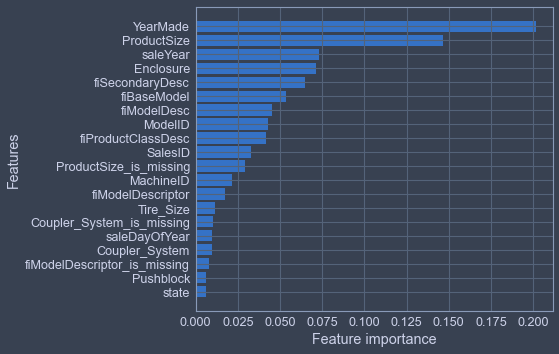

In [59]:
plot_features(x_train.columns, ideal_model.feature_importances_)

**Questiion to finish**

Why might learning the feature importance of a trained machine learning model be helpful?

Thats easy, knowing what columns contribute to your results can be crucial information in how the data is collected.. We can then learn which columns do not need to be processed by the ML model, or which columns should never have missing values to aim for high accuracy. UNderstanding what features contribute the most allows us to see where our model is picking the patterns from and feed into it more easily

 ** One more Question**
    
What other machine learning models could you try on this dataset? (Look at the machine learning map again or try Catboost.ai or XGBoost.ai)